# 2.1 Data Manipulation

### Getting Started

In [1]:
import torch

In [2]:
x = torch.arange(12, dtype=torch.float32)
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [3]:
x.shape #the length along each axis

torch.Size([12])

In [4]:
x.numel() #the total number of elements

12

In [5]:
X = x.reshape(3,4) #3 rows and 4 columns
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [6]:
#automatically 
print(x.reshape(-1, 4))
print()
print(x.reshape(3, -1))

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])


In [7]:
#zero matrices 
torch.zeros((2,3,4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [8]:
#one martices
torch.ones((2,3,4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [9]:
#randomly sampled from a standard Gaussian (normal) distribution with a mean of 0 and a standard deviation of 1
torch.randn(3,4) 

tensor([[-0.2187,  0.0122, -0.4260, -0.3359],
        [-0.4538,  1.5760,  2.1322,  0.4223],
        [-0.2582, -0.0321, -0.2613,  1.1563]])

In [10]:
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

### Operations

In [11]:
x = torch.tensor([1.0,2,4,8])
y = torch.tensor([2,2,2,2])
x+y, x-y, x*y, x/y, x**y #The ** operator is exponentiation

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [12]:
torch.exp(x) #e^1.0, e^2, e^4, e^8

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

In [13]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0,1,4,3], [1,2,3,4], [4,3,2,1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1) #concatenate

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [14]:
#logical statements
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [15]:
X.sum()

tensor(66.)

### Broadcasting Mechanism

In [16]:
a = torch.arange(3).reshape((3,1))
b = torch.arange(2).reshape((1,2))
a, b

(tensor([[0],
         [1],
         [2]]), tensor([[0, 1]]))

In [17]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

### Indexing and Slicing

In [18]:
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [19]:
X[-1]

tensor([ 8.,  9., 10., 11.])

In [20]:
X[1:3]

tensor([[ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [21]:
X[1,2] = 9
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  9.,  7.],
        [ 8.,  9., 10., 11.]])

In [22]:
X[0:2, :]

tensor([[0., 1., 2., 3.],
        [4., 5., 9., 7.]])

In [23]:
X[0:2, :] =12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

### Saving Memory

In [24]:
Y

tensor([[2., 1., 4., 3.],
        [1., 2., 3., 4.],
        [4., 3., 2., 1.]])

In [25]:
id(Y) #allocated memory location

140450949268688

In [26]:
before = id(Y)
Y = Y + X
id(Y) == before

False

In [27]:
id(Y) #new location in memory

140450948979216

In [28]:
Z = torch.zeros_like(Y)
print(Z)
print('id(Z):', id(Z))

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
id(Z): 140450948978640


In [29]:
Z[:] = X + Y
print(Z[:], Z)
print('id(Z):', id(Z))

tensor([[26., 25., 28., 27.],
        [25., 26., 27., 28.],
        [20., 21., 22., 23.]]) tensor([[26., 25., 28., 27.],
        [25., 26., 27., 28.],
        [20., 21., 22., 23.]])
id(Z): 140450948978640


In [30]:
before = id(X)
X += Y
id(X) == before

True

### Conversion to Other Python Objects

In [31]:
A = X.numpy()
B = torch.from_numpy(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [32]:
#To convert a size-1 tensor to a Python scalar
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

### Summary
- The main interface to store and manipulate data for deep learning is the tensor ( n-dimensional array).
-  It provides a variety of functionalities including basic mathematics operations, broadcasting, indexing, slicing, memory saving, and conversion to other Python objects.

### Exercises


1. Run the code in this section. Change the conditional statement X == Y in this section to X < Y or X > Y, and then see what kind of tensor you can get.

In [33]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0,1,4,3], [1,2,3,4], [4,3,2,1]])

print(X)
print()
print(Y)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

tensor([[2., 1., 4., 3.],
        [1., 2., 3., 4.],
        [4., 3., 2., 1.]])


In [34]:
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [35]:
X < Y

tensor([[ True, False,  True, False],
        [False, False, False, False],
        [False, False, False, False]])

In [36]:
X > Y

tensor([[False, False, False, False],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True]])

2. Replace the two tensors that operate by element in the broadcasting mechanism with other shapes, e.g., 3-dimensional tensors. Is the result the same as expected?

In [38]:
a = torch.arange(1, 6, dtype =torch.float32).reshape((5, 1))
b = torch.arange(1, 3).reshape((1, 2))

print(a)
print()
print(b)

tensor([[1.],
        [2.],
        [3.],
        [4.],
        [5.]])

tensor([[1, 2]])


In [39]:
a + b

tensor([[2., 3.],
        [3., 4.],
        [4., 5.],
        [5., 6.],
        [6., 7.]])

In [40]:
a - b

tensor([[ 0., -1.],
        [ 1.,  0.],
        [ 2.,  1.],
        [ 3.,  2.],
        [ 4.,  3.]])

In [41]:
a * b

tensor([[ 1.,  2.],
        [ 2.,  4.],
        [ 3.,  6.],
        [ 4.,  8.],
        [ 5., 10.]])

In [42]:
a / b

tensor([[1.0000, 0.5000],
        [2.0000, 1.0000],
        [3.0000, 1.5000],
        [4.0000, 2.0000],
        [5.0000, 2.5000]])

In [43]:
a // b

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  """Entry point for launching an IPython kernel.


tensor([[1., 0.],
        [2., 1.],
        [3., 1.],
        [4., 2.],
        [5., 2.]])

In [44]:
a ** b

tensor([[ 1.,  1.],
        [ 2.,  4.],
        [ 3.,  9.],
        [ 4., 16.],
        [ 5., 25.]])

In [45]:
a % b

tensor([[0., 1.],
        [0., 0.],
        [0., 1.],
        [0., 0.],
        [0., 1.]])

# 2.2 Data Preprocessing

### Reading the Dataset

In [46]:
#마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [47]:
#데이터 로드 경로 지정
import os
path = '/content/drive/MyDrive/Colab Notebooks/data/' # 폴더 경로
os.chdir(path) # 해당 폴더로 이동

In [48]:
#we write the dataset row by row into a csv file.
os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n')  # Column names
    f.write('NA,Pave,127500\n')  # Each row represents a data example
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

In [49]:
import pandas as pd
# If pandas is not installed, just uncomment the following line:
# !pip install pandas

data = pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


### Handling Missing Data

In [50]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
print(inputs)
print()
print(outputs)

   NumRooms Alley
0       NaN  Pave
1       2.0   NaN
2       4.0   NaN
3       NaN   NaN

0    127500
1    106000
2    178100
3    140000
Name: Price, dtype: int64


In [51]:
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN


In [53]:
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0           1          0
1       2.0           0          1
2       4.0           0          1
3       3.0           0          1


### Conversion to the Tensor Format

In [55]:
inputs.values

array([[3., 1., 0.],
       [2., 0., 1.],
       [4., 0., 1.],
       [3., 0., 1.]])

In [56]:
outputs.values

array([127500, 106000, 178100, 140000])

In [54]:
import torch

X, y = torch.tensor(inputs.values), torch.tensor(outputs.values)
X, y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

### Summary
- Like many other extension packages in the vast ecosystem of Python, pandas can work together with tensors.
- Imputation and deletion can be used to handle missing data.



### Exercises
Create a raw dataset with more rows and columns.

1. Delete the column with the most missing values.

In [57]:
data

,NumRooms,Alley,Price
0,NaN,Pave,127500
1,2.0,NaN,106000
2,4.0,NaN,178100
3,NaN,NaN,140000


In [59]:
null_count = data.isnull().sum()
null_count

NumRooms    2
Alley       3
Price       0
dtype: int64

In [60]:
#.reset_index() --> series를 data frame으로 변환
data_null_count = null_count.reset_index()
data_null_count

,index,0
0,NumRooms,2
1,Alley,3
2,Price,0


In [61]:
data_null_count.columns = ["컬럼명", "결측치수"]

In [67]:
data_null_count_top1 = data_null_count.sort_values(by="결측치수", ascending=False).head(1) #결측치가 가장 많은 top1
data_null_count_top1

,컬럼명,결측치수
1,Alley,3


In [68]:
drop_cloumns = data_null_count_top1["컬럼명"]
print(drop_cloumns)

data_drop = data.drop(drop_cloumns, axis=1)
print(data_drop)

1    Alley
Name: 컬럼명, dtype: object
   NumRooms   Price
0       NaN  127500
1       2.0  106000
2       4.0  178100
3       NaN  140000


In [72]:
#Some Other Way

# calculate the max of the NaN numbers of all columns 
m = max(data.isnull().sum(axis = 0))
print(m)
print(len(data))
data_dropmaxnan = data.dropna(axis = 1, thresh = len(data)+1-m)
print(data_dropmaxnan)

3
4
   NumRooms   Price
0       NaN  127500
1       2.0  106000
2       4.0  178100
3       NaN  140000


2. Convert the preprocessed dataset to the tensor format.

In [76]:
inputs, outputs = data_dropmaxnan.iloc[:, 0:-1], data_dropmaxnan.iloc[:, -1]
inputs = inputs.fillna(inputs.mean())
X, y = torch.tensor(inputs.values), torch.tensor(outputs.values)

In [77]:
X, y

(tensor([[3.],
         [2.],
         [4.],
         [3.]], dtype=torch.float64), tensor([127500, 106000, 178100, 140000]))

# 2.3. Linear Algebra

### Scalars

In [79]:
import torch

x = torch.tensor(3.0)
y = torch.tensor(2.0)

x + y, x * y, x / y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

### Vectors

In [80]:
x = torch.arange(4)
x

tensor([0, 1, 2, 3])

In [81]:
x[3]

tensor(3)

### Length, Dimensionality, and Shape

In [82]:
len(x)

4

In [83]:
x.shape

torch.Size([4])

### Matrices

In [84]:
A = torch.arange(20).reshape(5, 4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

In [85]:
# matrix’s transpose
A.T

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

In [86]:
B = torch.tensor([[1,2,3], [2,0,4], [3,4,5]])
B

tensor([[1, 2, 3],
        [2, 0, 4],
        [3, 4, 5]])

In [87]:
B == B.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

### Tensors

In [88]:
X = torch.arange(24).reshape(2,3,4)
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

### Basic Properties of Tensor Arithmetic

In [89]:
A = torch.arange(20, dtype=torch.float32).reshape(5,4)
B = A.clone() #Assign a copy of `A` to `B` by allocating new memory
print(A)
print()
print(A+B)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])

tensor([[ 0.,  2.,  4.,  6.],
        [ 8., 10., 12., 14.],
        [16., 18., 20., 22.],
        [24., 26., 28., 30.],
        [32., 34., 36., 38.]])


In [90]:
A * B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

In [92]:
a = 2
X = torch.arange(24).reshape(2,3,4)
print(X)

print()
print(a + X)
print()
print((a*X).shape)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

tensor([[[ 2,  3,  4,  5],
         [ 6,  7,  8,  9],
         [10, 11, 12, 13]],

        [[14, 15, 16, 17],
         [18, 19, 20, 21],
         [22, 23, 24, 25]]])

torch.Size([2, 3, 4])


### Reduction

In [94]:
x = torch.arange(4, dtype=torch.float32)

print(x)
print()
print(x.sum())

tensor([0., 1., 2., 3.])

tensor(6.)


In [96]:
A

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])

In [95]:
A.shape, A.sum()

(torch.Size([5, 4]), tensor(190.))

In [97]:
#To reduce the row dimension (axis 0) by summing up elements of all the rows, we specify axis=0 when invoking the function

A_sum_axis0 = A.sum(axis=0)
A_sum_axis0, A_sum_axis0.shape #the dimension of axis 0 of the input is lost in the output shape

(tensor([40., 45., 50., 55.]), torch.Size([4]))

In [98]:
#Specifying axis=1 will reduce the column dimension (axis 1) by summing up elements of all the columns. 
A_sum_axis1 = A.sum(axis=1)
A_sum_axis1, A_sum_axis1.shape #the dimension of axis 1 of the input is lost in the output shape

(tensor([ 6., 22., 38., 54., 70.]), torch.Size([5]))

In [99]:
#Reducing a matrix along both rows and columns via summation is equivalent to summing up all the elements of the matrix.

A.sum(axis=[0, 1])  # Same as `A.sum()`

tensor(190.)

In [100]:
A.mean()

tensor(9.5000)

In [101]:
A.sum() / A.numel()

tensor(9.5000)

In [102]:
#along the specified axes

A.mean(axis=0)

tensor([ 8.,  9., 10., 11.])

In [103]:
A.sum(axis=0) / A.shape[0]

tensor([ 8.,  9., 10., 11.])

### Non-Reduction Sum

In [105]:
A

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])

In [104]:
sum_A = A.sum(axis=1, keepdims=True)
sum_A

tensor([[ 6.],
        [22.],
        [38.],
        [54.],
        [70.]])

In [106]:
A / sum_A

tensor([[0.0000, 0.1667, 0.3333, 0.5000],
        [0.1818, 0.2273, 0.2727, 0.3182],
        [0.2105, 0.2368, 0.2632, 0.2895],
        [0.2222, 0.2407, 0.2593, 0.2778],
        [0.2286, 0.2429, 0.2571, 0.2714]])

In [107]:
A.cumsum(axis=0)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.],
        [40., 45., 50., 55.]])

###  Dot Products

In [109]:
y = torch.ones(4, dtype = torch.float32)
x, y, torch.dot(x, y) #내적

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

In [110]:
#can express the dot product of two vectors equivalently by performing an elementwise multiplication and then a sum

torch.sum(x*y)

tensor(6.)

### Matrix-Vector Products

In [111]:
print(A)
print()
print(x)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])

tensor([0., 1., 2., 3.])


In [112]:
A.shape, x.shape, torch.mv(A, x) #expressin matrix-vector products in code with tensors, we use the mv function

#note that the column dimension of A (its length along axis 1) must be the same as the dimension of x (its length)

(torch.Size([5, 4]), torch.Size([4]), tensor([ 14.,  38.,  62.,  86., 110.]))

### Matrix-Matrix Multiplication

In [113]:
#expression matrix-matrix products in code with tensors, we use the mm function

B = torch.ones(4, 3)
torch.mm(A, B)

tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.],
        [54., 54., 54.],
        [70., 70., 70.]])

### Norms

Informally, the norm of a vector tells us how big a vector is. The notion of size under consideration here concerns not dimensionality but rather the magnitude of the components.

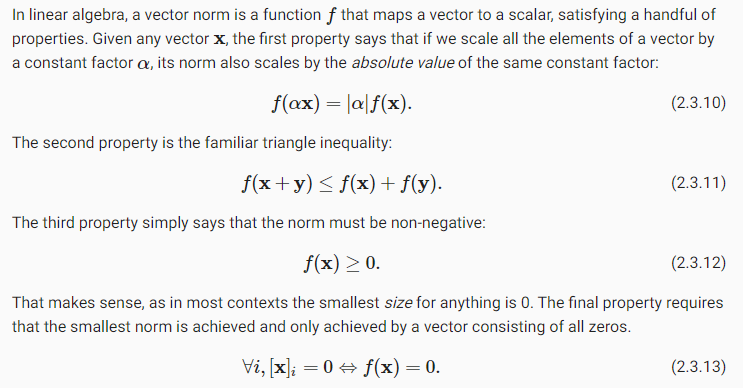


In fact, the Euclidean distance is a norm: specifically it is the  L2  norm

The L2 norm of x is the square root of the sum of the squares of the vector elements

이미지 출처: http://d2l.ai/chapter_preliminaries/linear-algebra.html

In [114]:
u = torch.tensor([3.0, -4.0])
torch.norm(u) #L2 norm of a vector

tensor(5.)

In [115]:
#L1 norm, which is expressed as the sum of the absolute values of the vector elements

torch.abs(u).sum() #L1 norm of a vector

tensor(7.)

In [116]:
torch.norm(torch.ones((4, 9))) #Frobenius norm

tensor(6.)

### Summary
- Scalars, vectors, matrices, and tensors are basic mathematical objects in linear algebra.

- Vectors generalize scalars, and matrices generalize vectors.

- Scalars, vectors, matrices, and tensors have zero, one, two, and an arbitrary number of axes, respectively.

- A tensor can be reduced along the specified axes by sum and mean.

- Elementwise multiplication of two matrices is called their Hadamard product. It is different from matrix multiplication.

- In deep learning, we often work with norms such as the  L1  norm, the  L2  norm, and the Frobenius norm.

- We can perform a variety of operations over scalars, vectors, matrices, and tensors.

# 2.4 Calculus

### Derivatives and Differentiation

In [ ]:
%matplotlib inline
import numpy as np
from IPython import display
!pip install d2l
from d2l import torch as d2l

def f(x):
    return 3*x**2-4*x

In [2]:
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


In [3]:
def use_svg_display():  #@save
    """Use the svg format to display a plot in Jupyter."""
    display.set_matplotlib_formats('svg')

In [4]:
def set_figsize(figsize=(3.5, 2.5)):  #@save
    """Set the figure size for matplotlib."""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

In [5]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [6]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points."""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    #Return True if `X` (tensor or list) has 1 axis
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

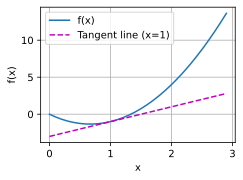

In [8]:
x = np.arange(0,3,0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

### Summary
- Differential calculus and integral calculus are two branches of calculus, where the former can be applied to the ubiquitous optimization problems in deep learning.

- A derivative can be interpreted as the instantaneous rate of change of a function with respect to its variable. It is also the slope of the tangent line to the curve of the function.

- A gradient is a vector whose components are the partial derivatives of a multivariate function with respect to all its variables.

- The chain rule enables us to differentiate composite functions.

# 2.5 Automatic Differentiation

### A Simple Example

 Automatic differentiation enables the system to subsequently backpropagate gradients. Here, backpropagate simply means to trace through the computational graph, filling in the partial derivatives with respect to each parameter.

In [15]:
import torch

x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [16]:
x.requires_grad_(True)  #Same as `x = torch.arange(4.0, requires_grad=True)`
x.grad  #The default value is None

In [17]:
torch.dot(x, x)

tensor(14., grad_fn=<DotBackward0>)

In [18]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [19]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [20]:
x.grad == 4 * x

tensor([True, True, True, True])

In [21]:
#PyTorch accumulates the gradient in default, we need to clear the previous values
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

### Backward for Non-Scalar Variables

In [22]:
#our intent is not to calculate the differentiation matrix but rather the sum of the partial derivatives computed individually for each example in the batch.

#Invoking `backward` on a non-scalar requires passing in a `gradient` argument
#which specifies the gradient of the differentiated function w.r.t `self`.
#In our case, we simply want to sum the partial derivatives, so passing
#in a gradient of ones is appropriate
x.grad.zero_()
y = x * x
#y.backward(torch.ones(len(x))) equivalent to the below
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

### Detaching Computation

In [23]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [24]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

### Computing the Gradient of Python Control Flow

In [25]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [26]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

In [27]:
a.grad == d / a

tensor(True)

### Summary
- Deep learning frameworks can automate the calculation of derivatives. To use it, we first attach gradients to those variables with respect to which we desire partial derivatives. We then record the computation of our target value, execute its function for backpropagation, and access the resulting gradient.

# 2.6. Probability

machine learning is all about making predictions

### Basic Probability Theory

In [28]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [29]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample() #random values each time

tensor([0., 1., 0., 0., 0., 0.])

In [30]:
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 0., 0., 1., 0.])

In [31]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([0., 0., 2., 1., 2., 5.])

In [33]:
#Store the results as 32-bit floats for division
counts = multinomial.Multinomial(1000, fair_probs).sample() #1000번
counts / 1000  #Relative frequency as the estimate

tensor([0.1450, 0.1770, 0.1800, 0.1670, 0.1720, 0.1590])

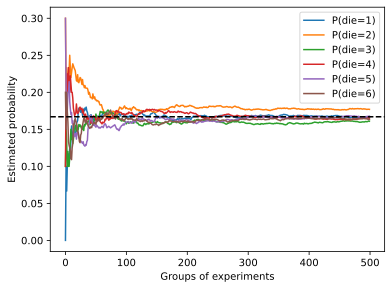

In [34]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

### Summary
- We can sample from probability distributions.

- We can analyze multiple random variables using joint distribution, conditional distribution, Bayes’ theorem, marginalization, and independence assumptions.

- Expectation and variance offer useful measures to summarize key characteristics of probability distributions.

# 2.7. Documentation

PyTorch  API

### Finding All the Functions and Classes in a Module

In [35]:
import torch

print(dir(torch.distributions))

['AbsTransform', 'AffineTransform', 'Bernoulli', 'Beta', 'Binomial', 'CatTransform', 'Categorical', 'Cauchy', 'Chi2', 'ComposeTransform', 'ContinuousBernoulli', 'CorrCholeskyTransform', 'Dirichlet', 'Distribution', 'ExpTransform', 'Exponential', 'ExponentialFamily', 'FisherSnedecor', 'Gamma', 'Geometric', 'Gumbel', 'HalfCauchy', 'HalfNormal', 'Independent', 'IndependentTransform', 'Kumaraswamy', 'LKJCholesky', 'Laplace', 'LogNormal', 'LogisticNormal', 'LowRankMultivariateNormal', 'LowerCholeskyTransform', 'MixtureSameFamily', 'Multinomial', 'MultivariateNormal', 'NegativeBinomial', 'Normal', 'OneHotCategorical', 'OneHotCategoricalStraightThrough', 'Pareto', 'Poisson', 'PowerTransform', 'RelaxedBernoulli', 'RelaxedOneHotCategorical', 'ReshapeTransform', 'SigmoidTransform', 'SoftmaxTransform', 'StackTransform', 'StickBreakingTransform', 'StudentT', 'TanhTransform', 'Transform', 'TransformedDistribution', 'Uniform', 'VonMises', 'Weibull', '__all__', '__builtins__', '__cached__', '__doc__'

### Finding the Usage of Specific Functions and Classes

In [36]:
help(torch.ones)

Help on built-in function ones:

ones(...)
    ones(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor
    
    Returns a tensor filled with the scalar value `1`, with the shape defined
    by the variable argument :attr:`size`.
    
    Args:
        size (int...): a sequence of integers defining the shape of the output tensor.
            Can be a variable number of arguments or a collection like a list or tuple.
    
    Keyword arguments:
        out (Tensor, optional): the output tensor.
        dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
            Default: if ``None``, uses a global default (see :func:`torch.set_default_tensor_type`).
        layout (:class:`torch.layout`, optional): the desired layout of returned Tensor.
            Default: ``torch.strided``.
        device (:class:`torch.device`, optional): the desired device of returned tensor.
            Default: if ``None``, uses the cur

In [37]:
torch.ones(4)

tensor([1., 1., 1., 1.])

### Summary

- The official documentation provides plenty of descriptions and examples that are beyond this book.

- We can look up documentation for the usage of an API by calling the dir and help functions, or ? and ?? in Jupyter notebooks.